In [1]:
# Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o dataset (substitua 'superstore_sales.csv' pelo caminho do seu arquivo)
df = pd.read_csv('C:/Users/brunoassis/OneDrive/Desktop/Analises com Python/Arquivos/Superstore Sales.csv')

In [3]:
# Exibir as primeiras linhas do dataset
print("Visualizando os dados:")
print(df.head(15))

Visualizando os dados:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0        1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1        2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2        3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3        4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4        5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
5        6  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
6        7  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
7        8  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
8        9  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
9       10  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
10      11  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
11      12  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
12      13  CA-2018-114412  15/04/2018  20/04/2018  Standard Class 

In [5]:
# Subsistiuindo '/' identificadas em algumas linhas
df['Order Date'] = df['Order Date'].str.replace('/', '-')
print(df['Order Date'].head(15))

0     08-11-2017
1     08-11-2017
2     12-06-2017
3     11-10-2016
4     11-10-2016
5     09-06-2015
6     09-06-2015
7     09-06-2015
8     09-06-2015
9     09-06-2015
10    09-06-2015
11    09-06-2015
12    15-04-2018
13    05-12-2017
14    22-11-2016
Name: Order Date, dtype: object


In [6]:
# Informações gerais sobre o dataset
print("\nInformações sobre os dados:")
print(df.info())


Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non

In [7]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [8]:
# Limpeza inicial: removendo valores ausentes
df.dropna(inplace=True)

In [9]:
# print(df['Order Date'].unique())
# print(df['Order Date'].head(20))
print(df['Order Date'].dtype)

object


In [10]:
# Convertendo a coluna de datas para o formato datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', errors='coerce' )

# Verificando se houve erros na conversão
print(df['Order Date'].isna().sum())
print(df['Order Date'].head(10))

0
0   2017-08-11
1   2017-08-11
2   2017-12-06
3   2016-11-10
4   2016-11-10
5   2015-09-06
6   2015-09-06
7   2015-09-06
8   2015-09-06
9   2015-09-06
Name: Order Date, dtype: datetime64[ns]


In [11]:
# Criando uma coluna com o ano e o mês para análise de tendências
df['Year-Month'] = df['Order Date'].dt.to_period('M')

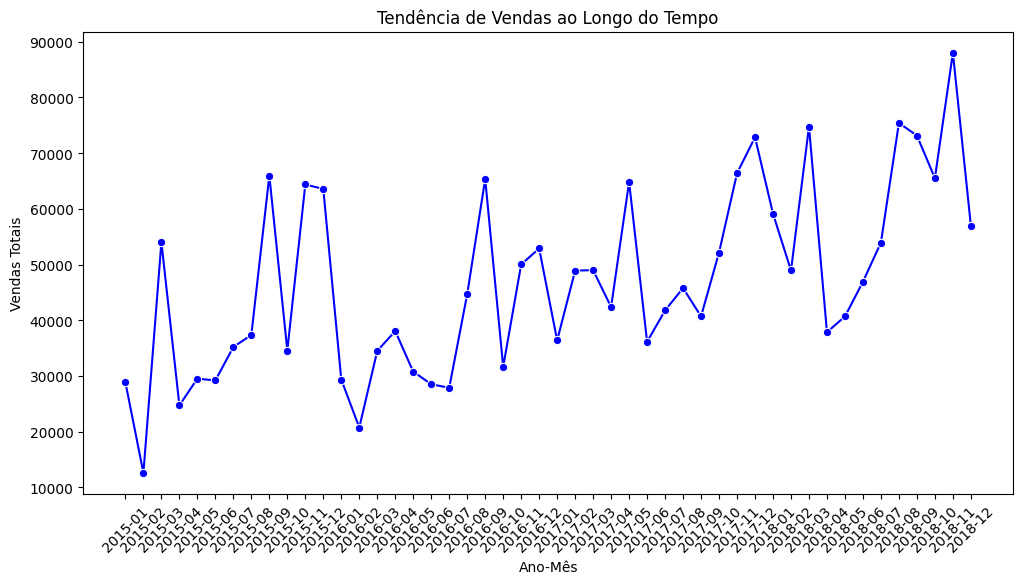

In [12]:
# Análise 1: Tendência de vendas ao longo do tempo
sales_trend = df.groupby('Year-Month')['Sales'].sum().reset_index()
sales_trend['Year-Month'] = sales_trend['Year-Month'].astype(str)  # Converte para string para facilitar o gráfico

# Visualizando a tendência de vendas
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Year-Month', y='Sales', marker='o', color='blue')
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()


Top 10 Produtos Mais Vendidos:
                                        Product Name      Sales
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...  22638.480
3       HON 5400 Series Task Chairs for Big and Tall  21870.576
4         GBC DocuBind TL300 Electric Binding System  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
6               Hewlett Packard LaserJet 3310 Copier  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
8          GBC DocuBind P400 Electric Binding System  17965.068
9        High Speed Automatic Electric Letter Opener  17030.312


C:\Users\brunoassis\AppData\Local\Temp\ipykernel_26220\2692723941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Sales', y='Product Name', palette='viridis')


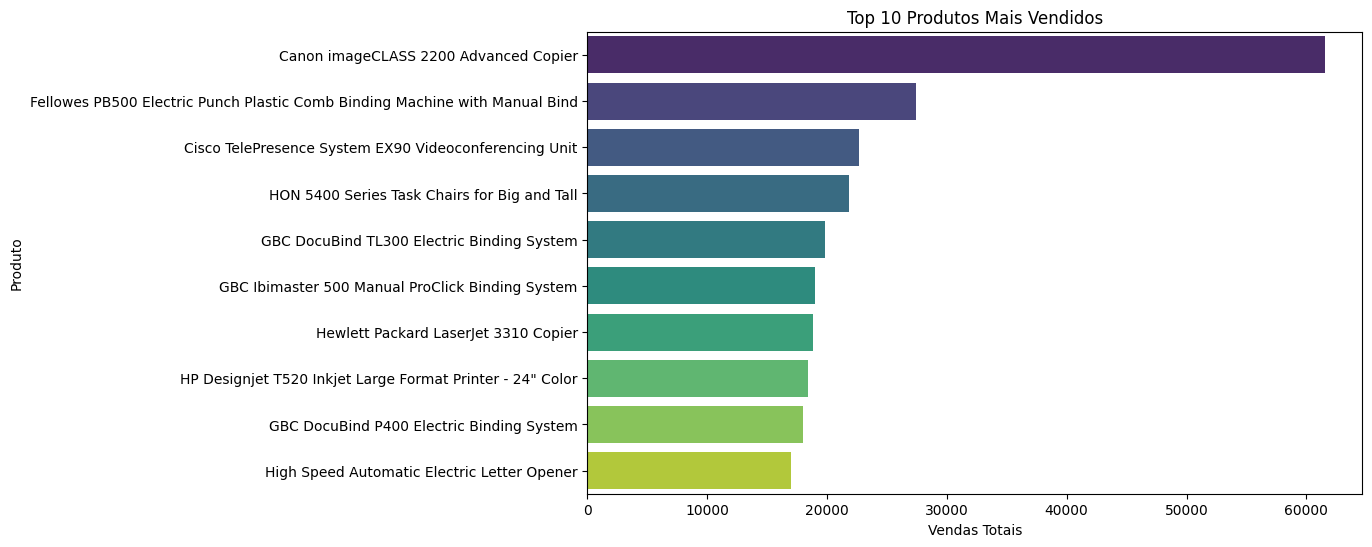

In [13]:
# Análise 3: Produtos mais vendidos (Top 10)
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

print("\nTop 10 Produtos Mais Vendidos:")
print(top_products)

# Visualizando os produtos mais vendidos
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Sales', y='Product Name', palette='viridis')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Vendas Totais')
plt.ylabel('Produto')
plt.show()



Análise de Vendas por Região:
    Region        Sales
0  Central  492646.9132
1     East  660589.3560
2    South  389151.4590
3     West  710219.6845


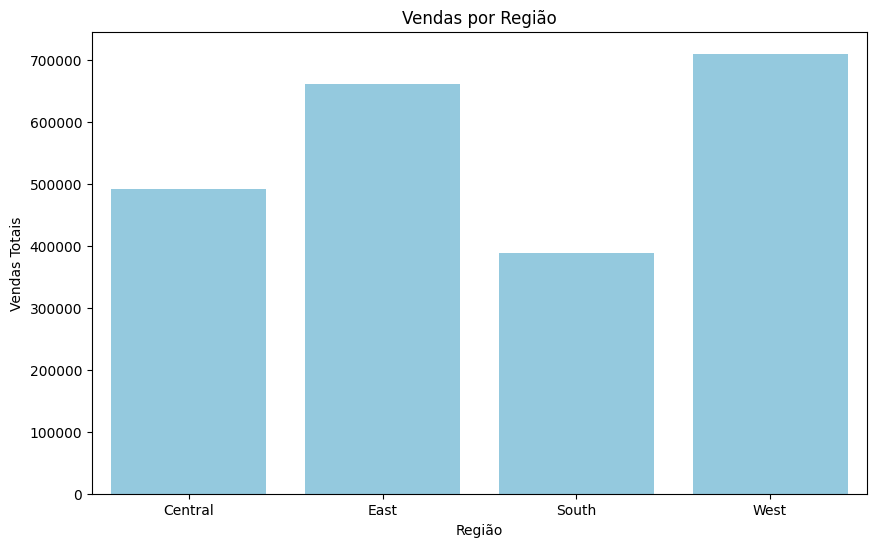


Análise de Vendas por Segmento de Cliente:
       Segment         Sales
0     Consumer  1.146708e+06
1    Corporate  6.822118e+05
2  Home Office  4.236874e+05


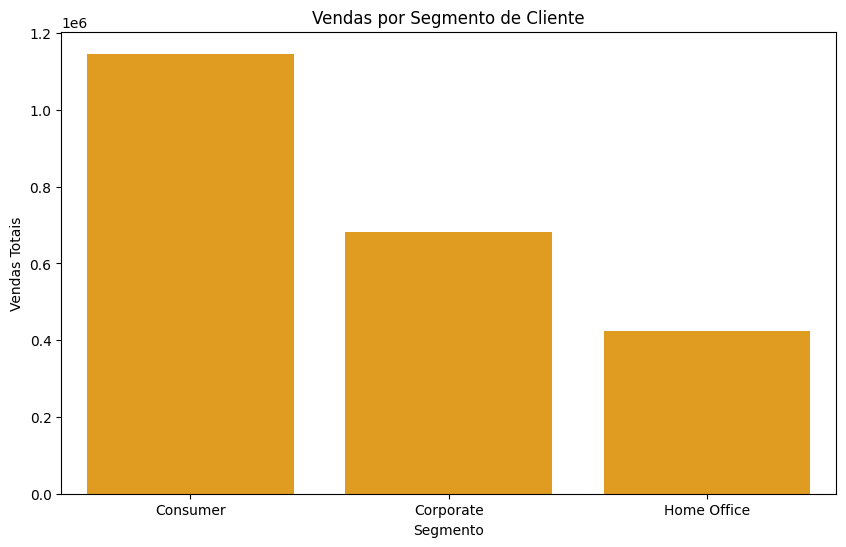

In [14]:
# Análise de vendas por região
region_analysis = df.groupby('Region')['Sales'].sum().reset_index()

print("\nAnálise de Vendas por Região:")
print(region_analysis)

# Gráfico: Vendas por região
plt.figure(figsize=(10, 6))
sns.barplot(data=region_analysis, x='Region', y='Sales', color='skyblue')
plt.title('Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Vendas Totais')
plt.show()

# Análise de vendas por segmento de cliente
segment_analysis = df.groupby('Segment')['Sales'].sum().reset_index()

print("\nAnálise de Vendas por Segmento de Cliente:")
print(segment_analysis)

# Gráfico: Vendas por segmento
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='Segment', y='Sales', color='orange')
plt.title('Vendas por Segmento de Cliente')
plt.xlabel('Segmento')
plt.ylabel('Vendas Totais')
plt.show()



Análise de Vendas por Ano:
   Year        Sales
0  2015  479856.2081
1  2016  454315.9054
2  2017  597225.4900
3  2018  721209.8092


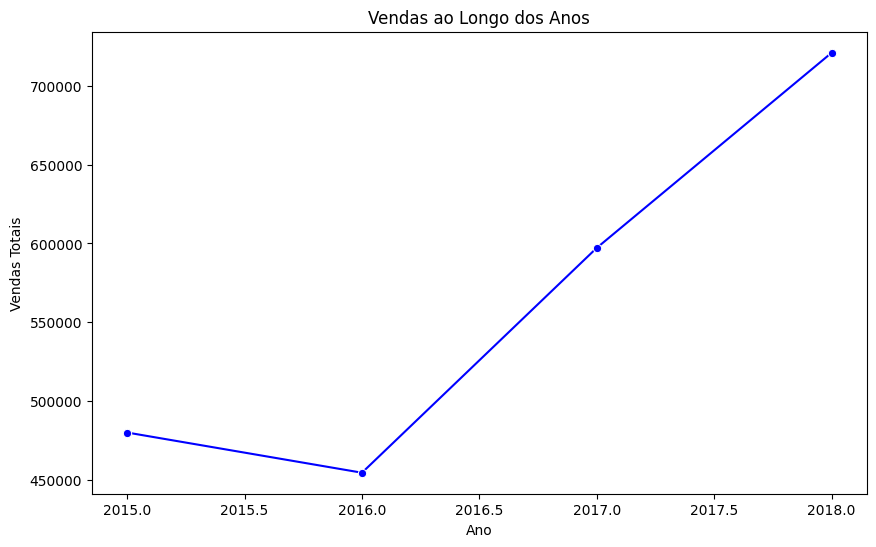


Crescimento Percentual de Vendas por Ano:
   Year  Sales Growth (%)
0  2015               NaN
1  2016         -5.322491
2  2017         31.455994
3  2018         20.760051


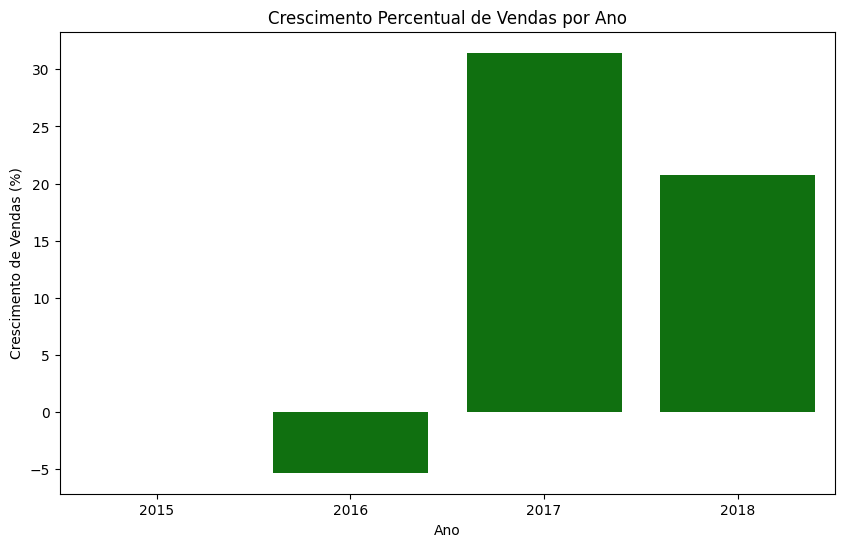

In [15]:
# Criando uma coluna com o ano
df['Year'] = df['Order Date'].dt.year

# Análise de vendas por ano
yearly_analysis = df.groupby('Year')['Sales'].sum().reset_index()

print("\nAnálise de Vendas por Ano:")
print(yearly_analysis)

# Gráfico: Vendas ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_analysis, x='Year', y='Sales', marker='o', color='blue')
plt.title('Vendas ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais')
plt.show()

# Comparação percentual de vendas entre anos
yearly_analysis['Sales Growth (%)'] = yearly_analysis['Sales'].pct_change() * 100

print("\nCrescimento Percentual de Vendas por Ano:")
print(yearly_analysis[['Year', 'Sales Growth (%)']])

# Gráfico: Crescimento percentual de vendas
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_analysis, x='Year', y='Sales Growth (%)', color='green')
plt.title('Crescimento Percentual de Vendas por Ano')
plt.xlabel('Ano')
plt.ylabel('Crescimento de Vendas (%)')
plt.show()